<a href="https://colab.research.google.com/github/azizhina51-svg/NLP/blob/main/RNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub tensorflow pandas numpy scikit-learn matplotlib

import kagglehub
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")
print("Dataset downloaded to:", path)


100%|██████████| 1.01M/1.01M [00:00<00:00, 71.7MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/mrmorj/hate-speech-and-offensive-language-dataset/versions/1


In [4]:
df = pd.read_csv(path + "/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [25]:
df.isnull().sum()
df = df.dropna(subset=['clean_tweet', 'class'])


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['class'])  # Already numeric, but good practice
labels = df['label'].values
texts = df['clean_tweet'].values


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')


In [27]:
print("Shape of padded sequences:", padded_sequences.shape)
print("Shape of labels:", labels.shape)


Shape of padded sequences: (24783, 100)
Shape of labels: (24783,)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(padded_sequences, labels, texts, test_size=0.2, random_state=42)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    batch_size=64)


Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 141s 433ms/step - accuracy: 0.7693 - loss: 0.7082 - val_accuracy: 0.7730 - val_loss: 0.6686
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 145s 444ms/step - accuracy: 0.7735 - loss: 0.6743 - val_accuracy: 0.7730 - val_loss: 0.6677
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 135s 435ms/step - accuracy: 0.7714 - loss: 0.6753 - val_accuracy: 0.7730 - val_loss: 0.6652
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 154s 474ms/step - accuracy: 0.7721 - loss: 0.6718 - val_accuracy: 0.7730 - val_loss: 0.6701
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 190s 434ms/step - accuracy: 0.7748 - loss: 0.6712 - val_accuracy: 0.7730 - val_loss: 0.6660


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7743 - loss: 0.6678
Test Accuracy: 0.773


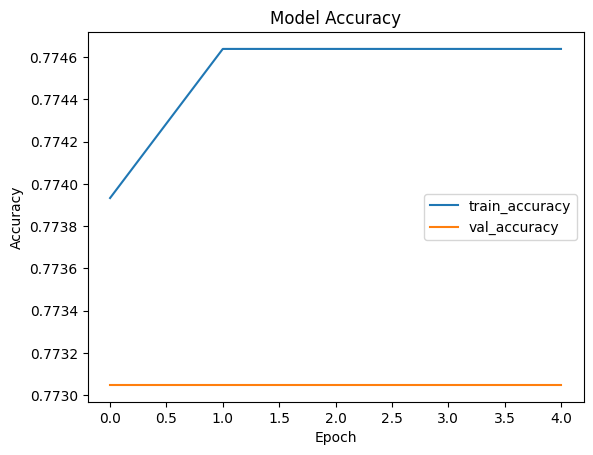

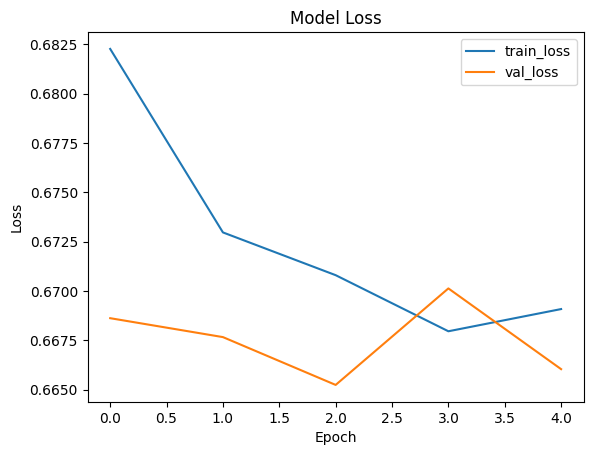

In [35]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [37]:
label_mapping = {
    0: "Hate Speech",
    1: "Offensive Language",
    2: "Neither"
}


In [40]:
preds = model.predict(X_test)
for i, text in enumerate(texts_test):
    pred_class = np.argmax(preds[i])
    print(f"Text: {text}")
    print(f"Predicted class: {pred_class} → {label_mapping[pred_class]}\n")

Streaming output truncated to the last 5000 lines.
Predicted class: 1 → Offensive Language

Text: bruh pt 2 jaxon1114 killed this hoe too last night while we was sleep
Predicted class: 1 → Offensive Language

Text: simple minded hoe
Predicted class: 1 → Offensive Language

Text: brown is a color so my eyes are colored
Predicted class: 1 → Offensive Language

Text: aint nuttin but a white trash party
Predicted class: 1 → Offensive Language

Text: slow the fuck down bitch i know where you live

classy young lady
Predicted class: 1 → Offensive Language

Text: who the fuck still plays flappy bird 128514

8220 flappy bird feels like
Predicted class: 1 → Offensive Language

Text: smells meaty up in dis bitch
Predicted class: 1 → Offensive Language

Text: im sorry im sorry i cant fuc wit u no mo hoe and im sorry 128514
Predicted class: 1 → Offensive Language

Text: its 90 degrees and this bitch has a stuffed animal wrapped around her neck onlyattheducksgame
Predicted class: 1 → Offensive Lang